Laboratory exercise due to 24th of April 2024. 

Load the necessary libraries:

In [24]:
library(tidyverse)
library(geosphere)

1) read the data and import in a data.frame or tibble structure

In [2]:
df2 <- read.csv("Data_CitiBike/JC-201902-citibike-tripdata.csv")
df3 <- read.csv("Data_CitiBike/JC-201903-citibike-tripdata.csv")
df4 <- read.csv("Data_CitiBike/JC-201904-citibike-tripdata.csv")
df5 <- read.csv("Data_CitiBike/JC-201905-citibike-tripdata.csv")
df6 <- read.csv("Data_CitiBike/JC-201906-citibike-tripdata.csv")

2) merge the five data frames in a unique structure

In [3]:
df <- rbind(df2, df3, df4, df5, df6)

##Here I verify that the merging worked as supposed to
nrow(df)
nrow(df2)+nrow(df3)+nrow(df4)+nrow(df5)+nrow(df6)

[1] 150792

[1] 150792

3) check for missing data and remove it, if any

In [4]:
## na.omit(), when given a data.frame object, removes any row which has at least one missing value 
df <- na.omit(df)
nrow(df)

[1] 150792

As can be seen from the number of rows of the dataframe df printed above, since such number does not change, it means that no rows in the data.frame object had missing values.

4.1) compute the average and the median trip duration in minutes

In [5]:
avg_trip <- mean(df$tripduration)/60
med_trip <- median(df$tripduration)/60
print(paste("Average trip duration:", avg_trip))
print(paste("Median trip duration:", med_trip))

[1] "Average trip duration: 12.8107127699082"
[1] "Median trip duration: 5.68333333333333"


4.2) evaluate the minimum and maximum trip duration; does that sound like a reasonable value?

In [6]:
min_trip <- min(df$tripduration)/60
max_trip <- max(df$tripduration)/60
print(paste("Minimum trip duration:",min_trip))
print(paste("Maximum trip duration:",max_trip))

[1] "Minimum trip duration: 1.01666666666667"
[1] "Maximum trip duration: 28817"


As can be seen from the results printed above, the maximum trip duration is not a reasonable value for a bike trip, therefore it can be labelled as an outlier. 

4.3) repeat the calculation of the average (and the median) trip duration by excluding trips longer than
3 hours. Next, evaluate the number of skimmed entries

In [7]:
new_mean<-function(x){
    new_x <- x[x < 10800]
    return(mean(new_x))
}

new_med<-function(x){
    new_x <- x[x < 10800]
    return(median(new_x))
}

In [8]:
avg_trip2 <- new_mean(df$tripduration)/60
med_trip2 <- new_med(df$tripduration)/60
print(paste("Average trip duration:", avg_trip2))
print(paste("Median trip duration:", med_trip2))

## Evaluate the number of skimmed entries:
print(paste("Number of skimmed entries:",length(df$tripduration)-length(df$tripduration[df$tripduration < 10800])))

[1] "Average trip duration: 9.22190074308567"
[1] "Median trip duration: 5.66666666666667"
[1] "Number of skimmed entries: 428"


4.4) plot the distribution of trip duration after the skimming of the previous poin

In [9]:
## I set these options for the barplot function to print wider plots, so that the bins' values are better readable
options(repr.plot.width = 12, repr.plot.height = 6)

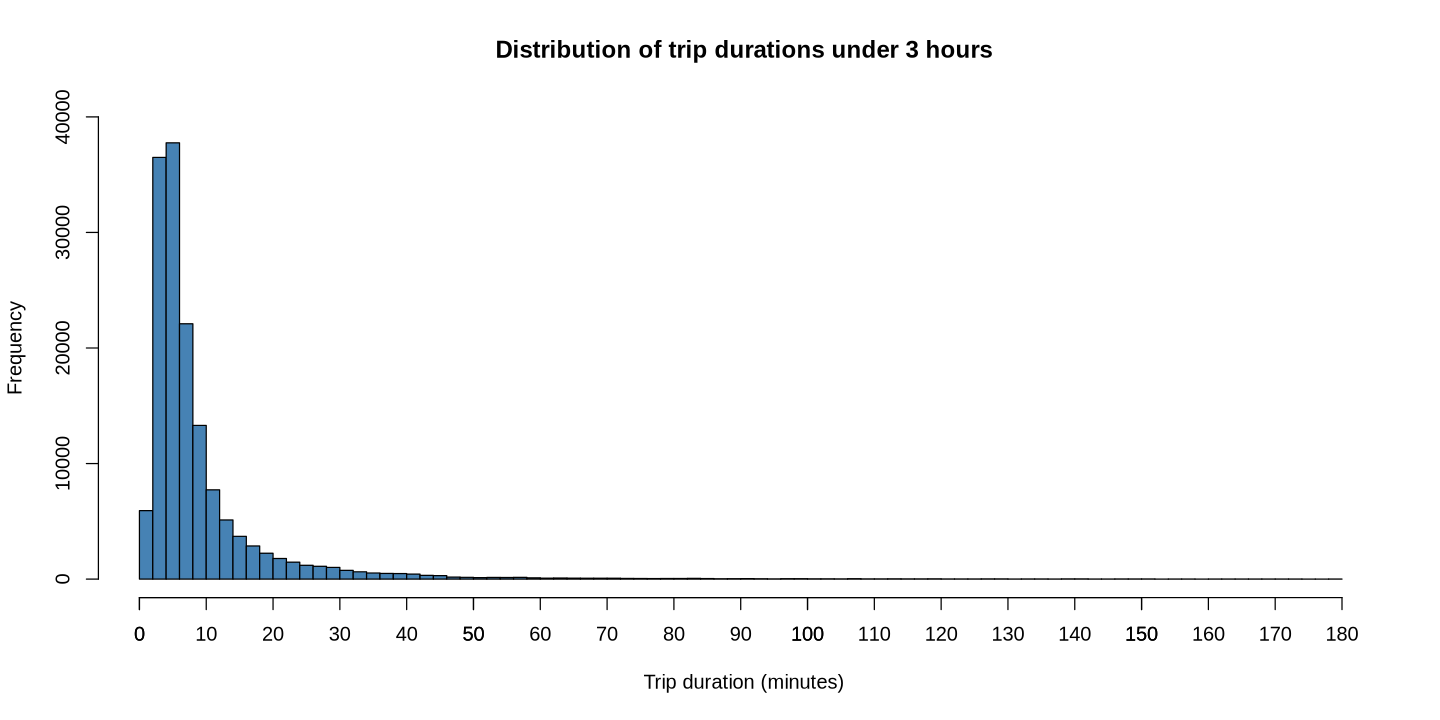

In [10]:
skimmed_trip <- df$tripduration[df$tripduration<10800]/60
hist(skimmed_trip,
    xlim = range(skimmed_trip),
    ylim = c(0,40000),
    breaks = 100,
    col = "steelblue",
    xlab = "Trip duration (minutes)",
    main = "Distribution of trip durations under 3 hours")

## This line is used to set the number of ticks on the x-axis
axis(side = 1, at = pretty(range(skimmed_trip), n = 25))

5) Plot the monthly average trip duration

[1] "Mean for February(2) : 10.0889927282521"
[1] "Mean for March(3) : 9.10293922449095"
[1] "Mean for April(4) : 11.8999279001291"
[1] "Mean for May(5) : 13.7353332410867"
[1] "Mean for June(6) : 16.2281659480937"


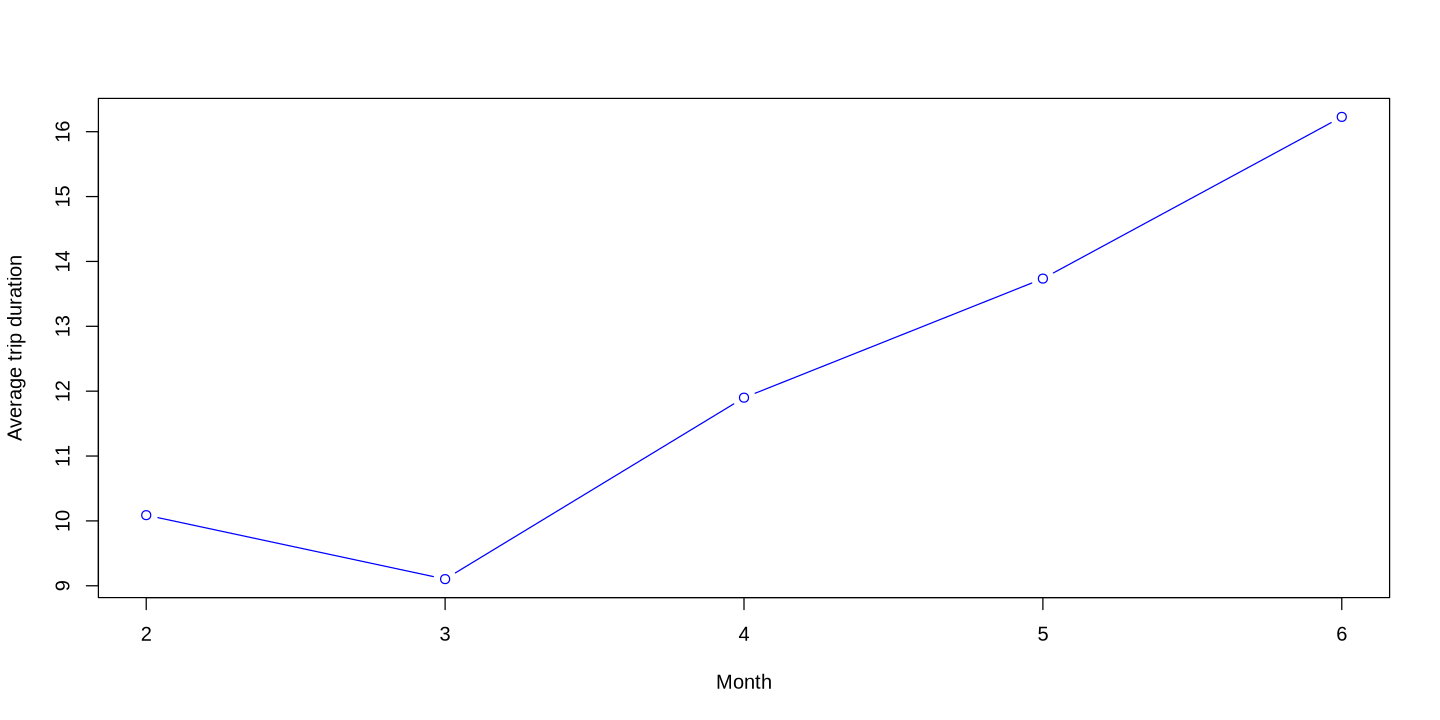

In [11]:
means<-c(mean(df2$tripduration)/60,
        mean(df3$tripduration)/60,
        mean(df4$tripduration)/60,
        mean(df5$tripduration)/60,
        mean(df6$tripduration)/60)
month<-c("February(2)", "March(3)", "April(4)", "May(5)", "June(6)")

plot(c(2,3,4,5,6),
    means,type='b',
    xlab = "Month",
    ylab = "Average trip duration",
    col='blue')
for (i in 2:6){
    print(paste("Mean for",month[i-1],":",means[i-1]))
}

6.1)plot the number of rides per day

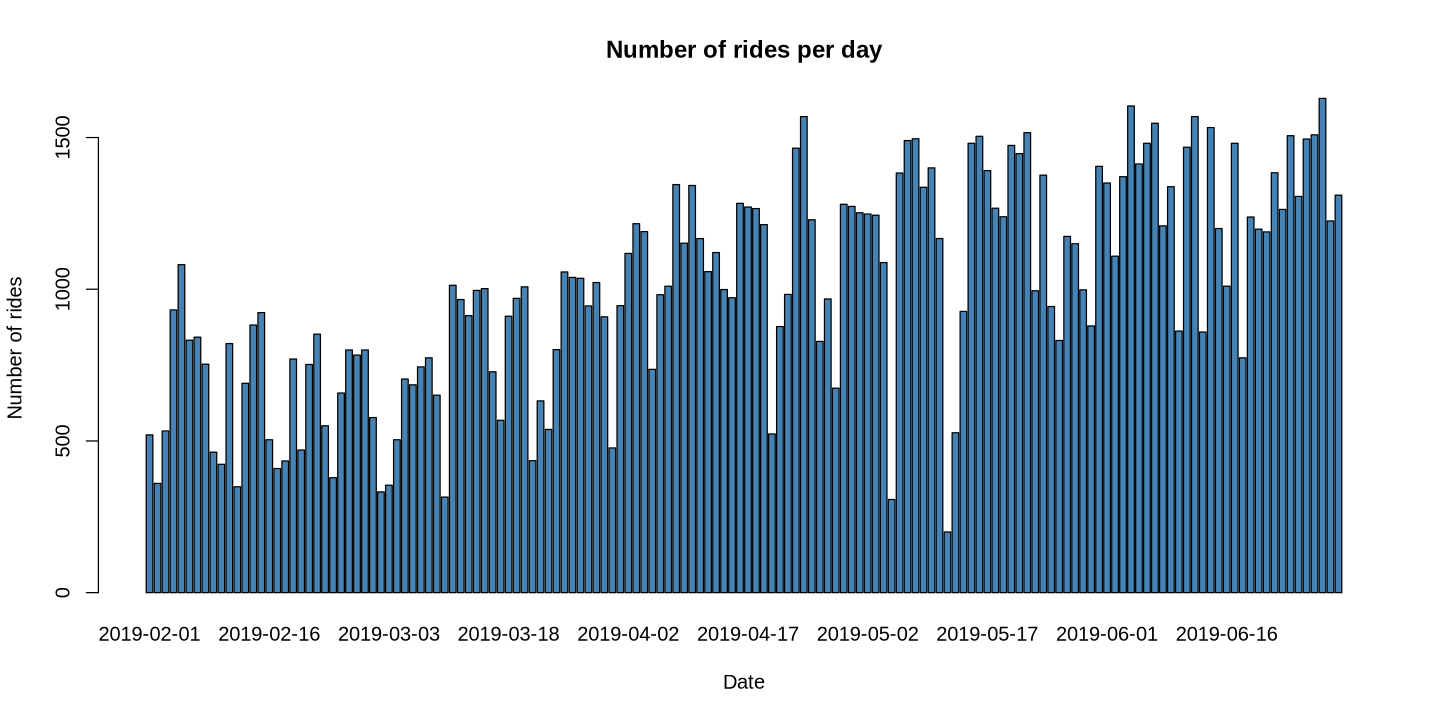

In [12]:
## I add a column containing the start date information to the data.frame object
df$date <- substr(df$starttime,1,10)

rides_per_day <- df %>%
 group_by(date) %>%
 summarize(num_rides = n())

barplot(rides_per_day$num_rides ~ rides_per_day$date,
        xlab = "Date",
        ylab = "Number of rides",
        col = "steelblue",
        main = "Number of rides per day")

#axis(side = 2, at = seq(0, 2000, by = 100), labels = seq(0, 2000, by = 100), las = 1)

6.2) plot the hourly distribution on weekdays and on the weekends

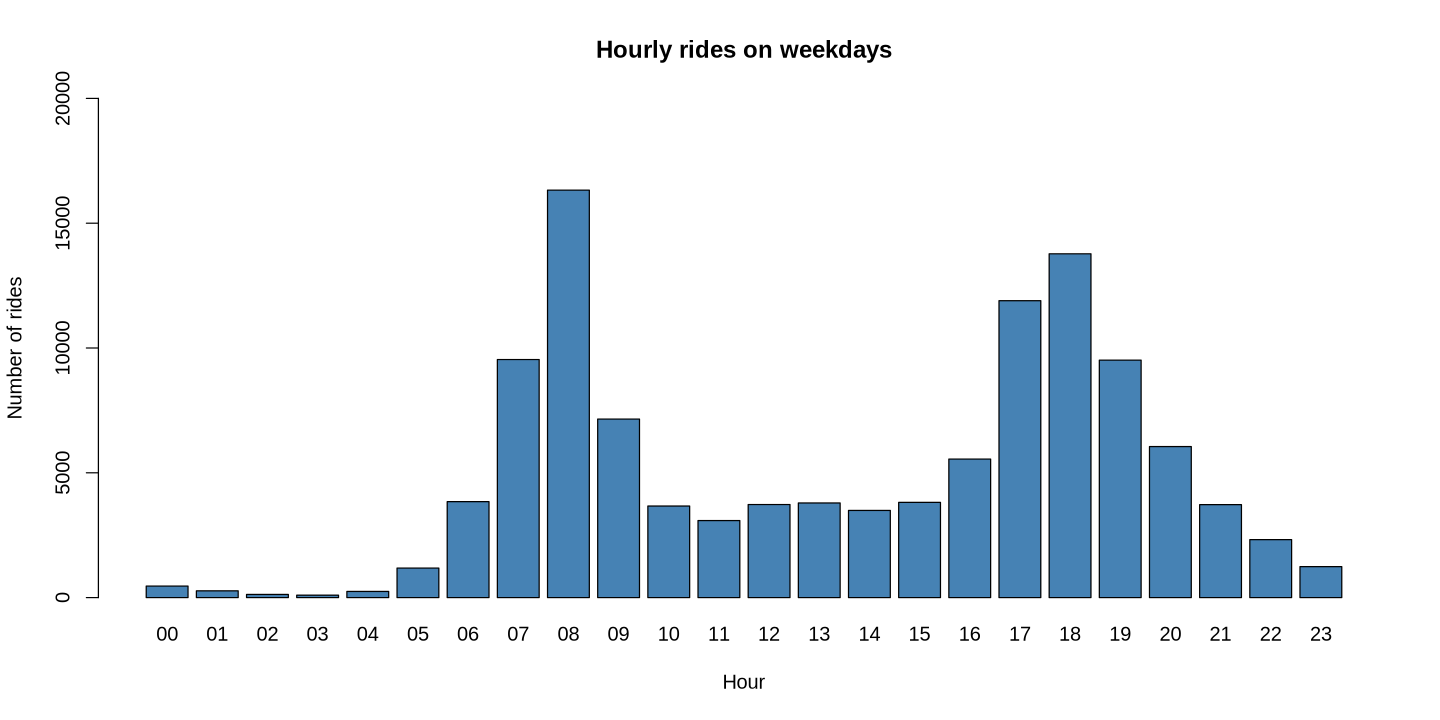

In [13]:
## Here I added a column to the dataframe displaying the start hour
df$hour <- substr(df$starttime,12,13)
df$dayname <- weekdays(as.Date(df$date))

df$weekday <- (df$dayname %in% c("Monday","Tuesday","Wednesday","Thursday","Friday"))

rides_h_weekday <- df %>%
    filter(df$weekday) %>%
    group_by(hour) %>%
    summarize(num_rides = n())

barplot(rides_h_weekday$num_rides ~ rides_h_weekday$hour,
        xlab = "Hour",
        ylab = "Number of rides",
        main = "Hourly rides on weekdays",
        ylim = c(0,20000),
        col = "steelblue")

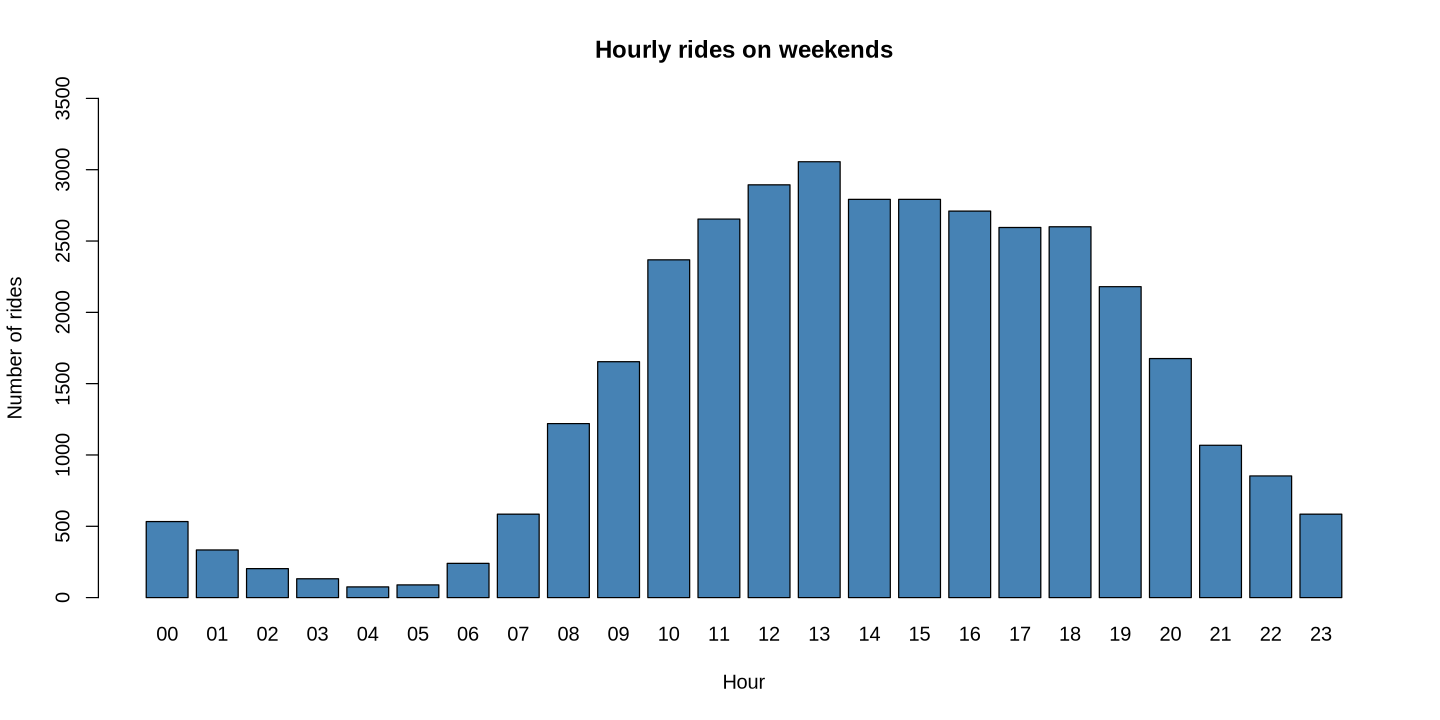

In [14]:
rides_h_weekend <- df %>%
    filter(!df$weekday) %>%
    group_by(hour) %>%
    summarize(num_rides = n())

barplot(rides_h_weekend$num_rides ~ rides_h_weekend$hour,
        xlab = "Hour",
        ylab = "Number of rides",
        main = "Hourly rides on weekends",
        ylim = c(0,3500),
        col = "steelblue")

6.3) plot again the average hourly distribution on weekdays but separating customer and subscriber users. 

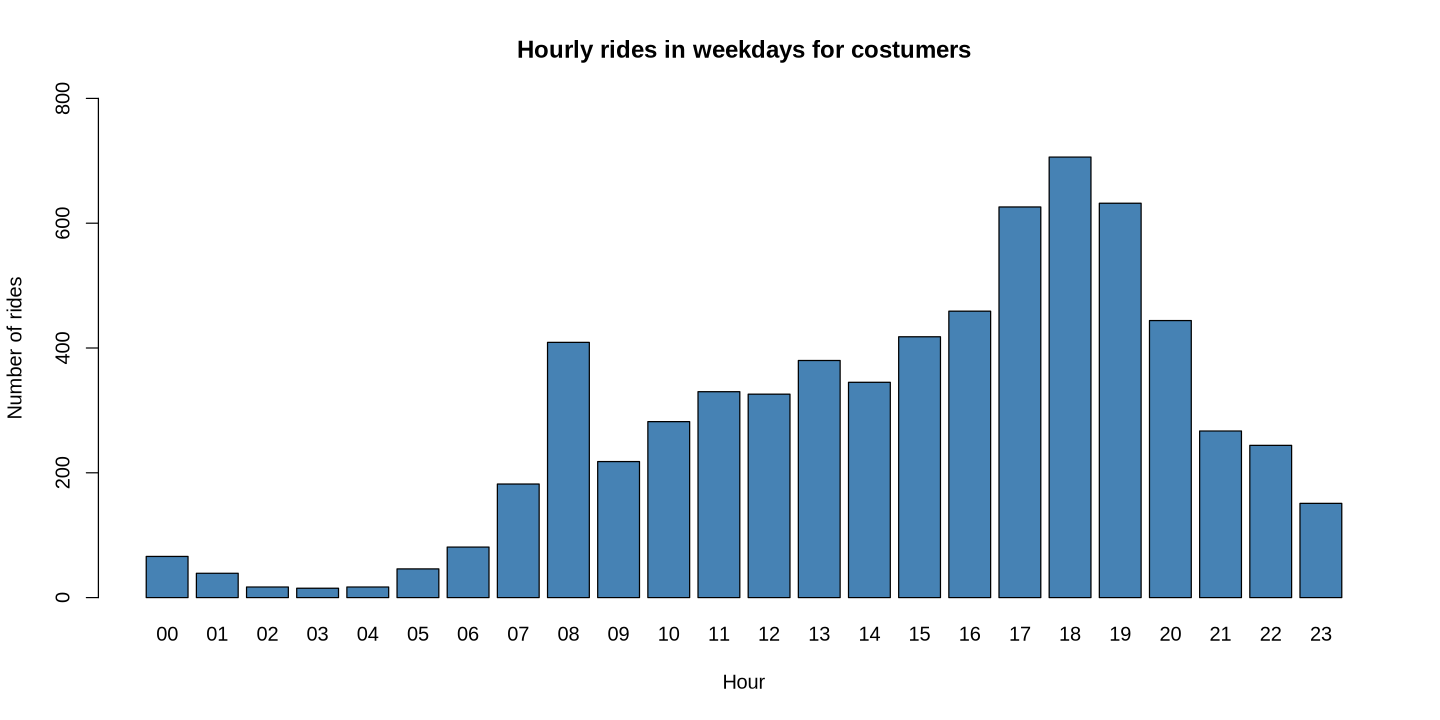

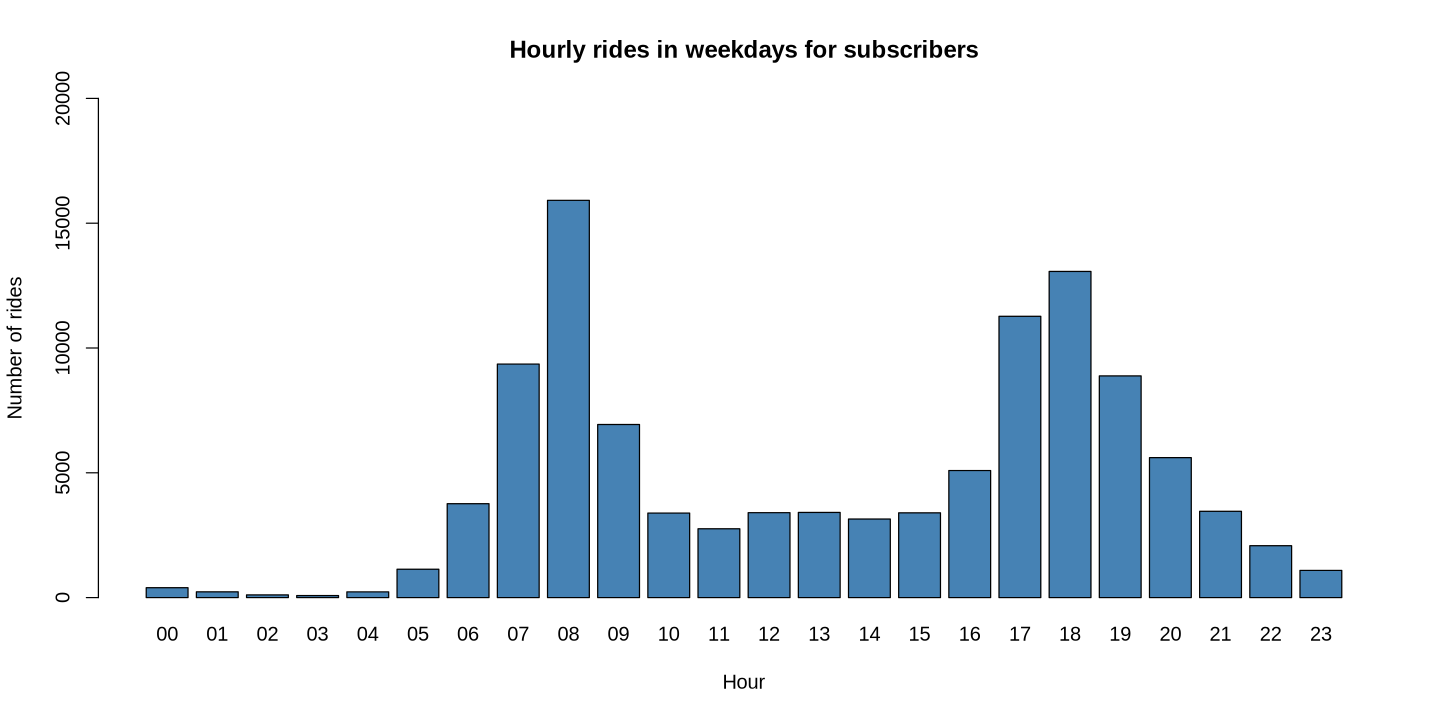

In [15]:
weekdays <- df %>%
    filter(df$weekday)

weekdays_cus <- weekdays %>%
    filter(weekdays$usertype == "Customer")

hour_cus <- weekdays_cus %>%
    group_by(hour) %>%
    summarize(n_rides = n())

weekdays_sub <- weekdays %>%
    filter(weekdays$usertype == "Subscriber")

hour_sub <- weekdays_sub %>%
    group_by(hour) %>%
    summarize(n_rides = n())

barplot(hour_cus$n_rides ~ hour_cus$hour,
        xlab = "Hour",
        ylab = "Number of rides",
        main = "Hourly rides in weekdays for costumers",
        ylim = c(0,800),
        col = "steelblue")
barplot(hour_sub$n_rides ~ hour_sub$hour,
        xlab = "Hour",
        ylab = "Number of rides",
        main = "Hourly rides in weekdays for subscribers",
        ylim = c(0,20000),
        col = "steelblue")

7.1) using the latitude and longitude information, evaluate the average speed (in km/h) of a user, discrding the triplasting longer than 1 hour.

In [16]:
library("geosphere")

In [17]:
## I define a function to calculate the distance through the Haversine method and from that the average speed in km/h
av_speed <- function(p1,p2,t){
    return((distHaversine(p1,p2)/t)*3.6)
}

less1hour <- df %>%
    filter(tripduration < 3600)

start <- less1hour %>%
    select(start.station.longitude,start.station.latitude)

end <- less1hour %>%
    select(end.station.longitude,end.station.latitude)

less1hour$avg_speed <- av_speed(start,end,less1hour$tripduration)

print(paste("Average speed (km/h):", mean(less1hour$avg_speed)))


[1] "Average speed (km/h): 9.24009722083186"


7.2) plot the average speed as a function of route length for the following group of distances d <500 m,
500 m <d <1000 m, 1000 m <d <2000 m, 2000 m <d <3000 m, d >3000 m and discarding
trips longer than 1 hour

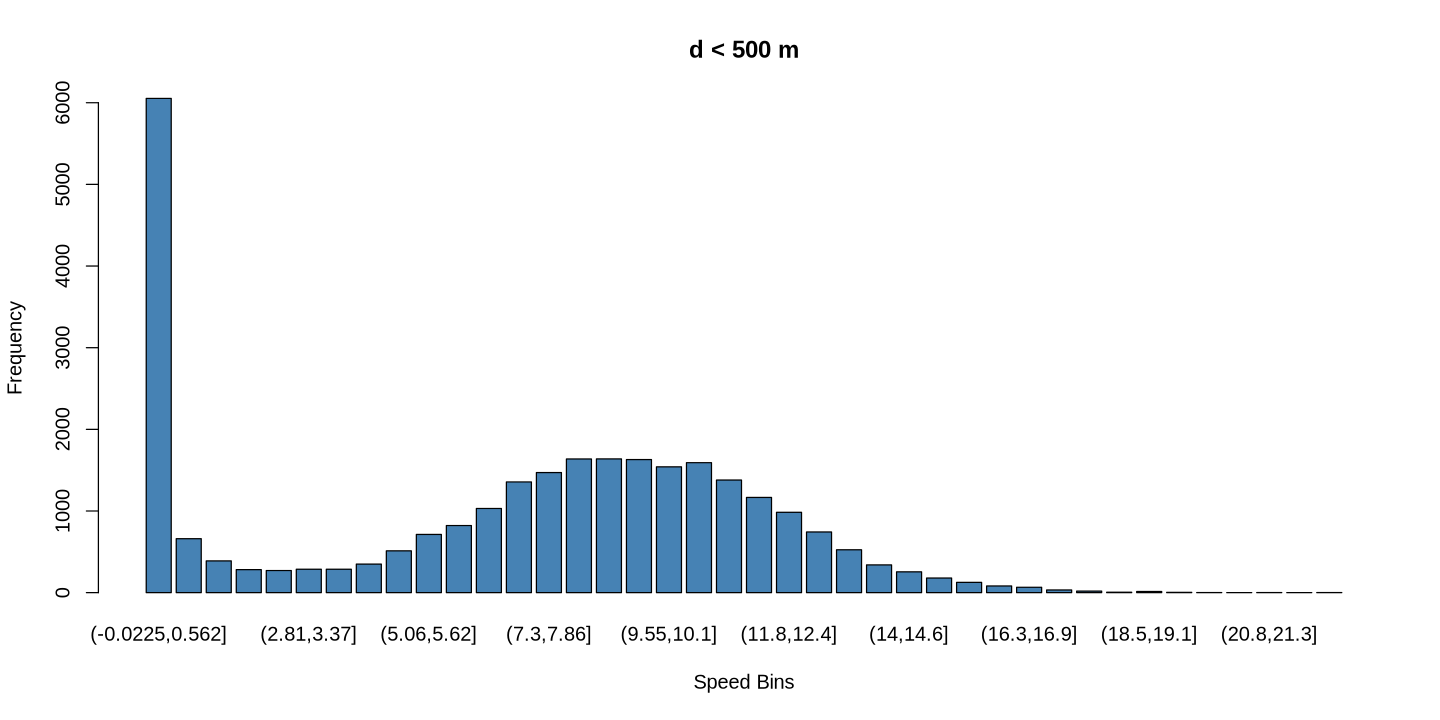

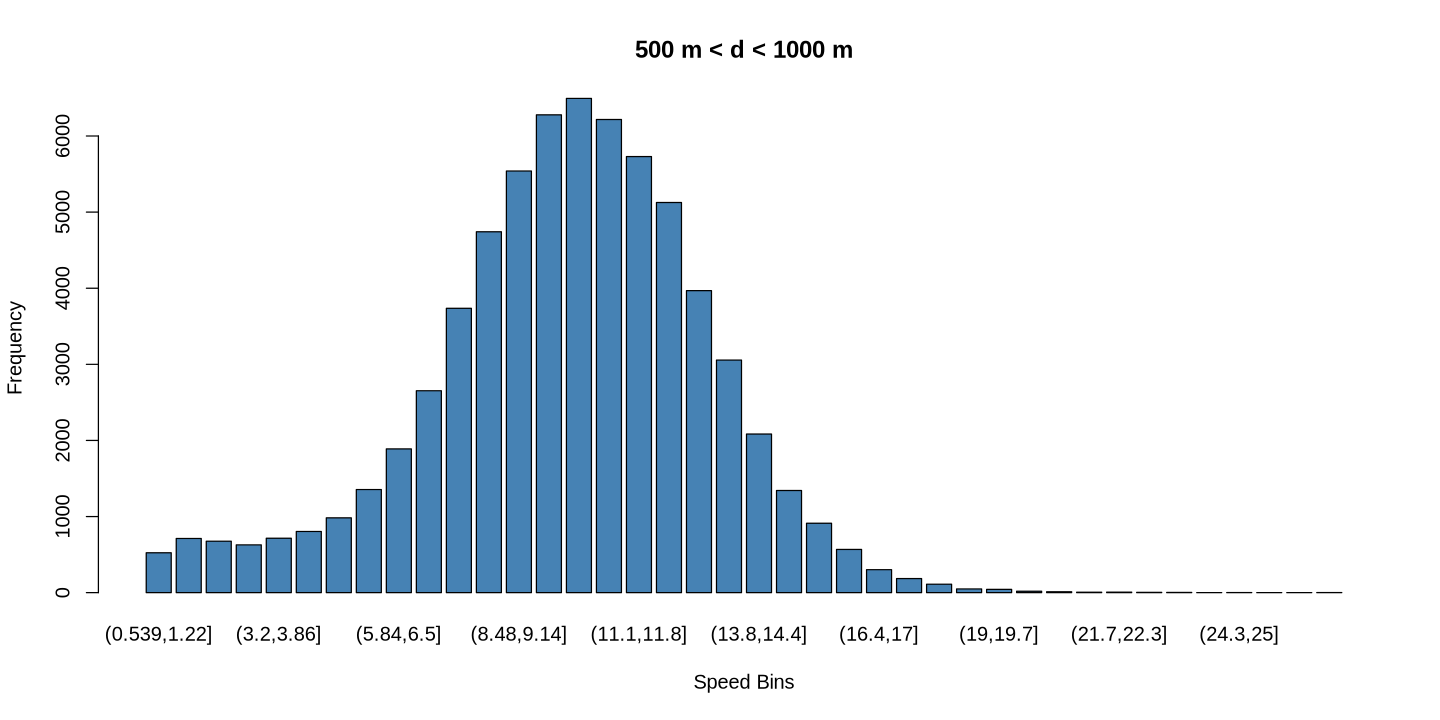

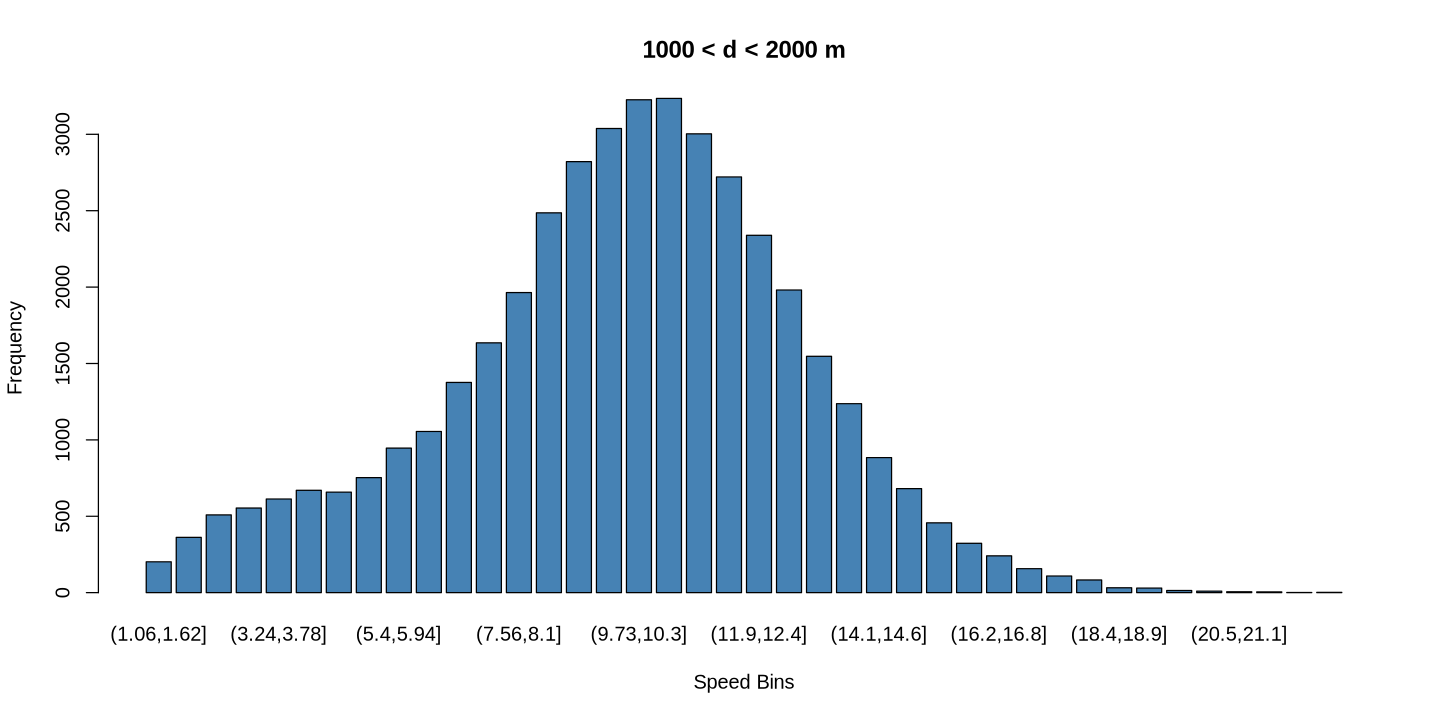

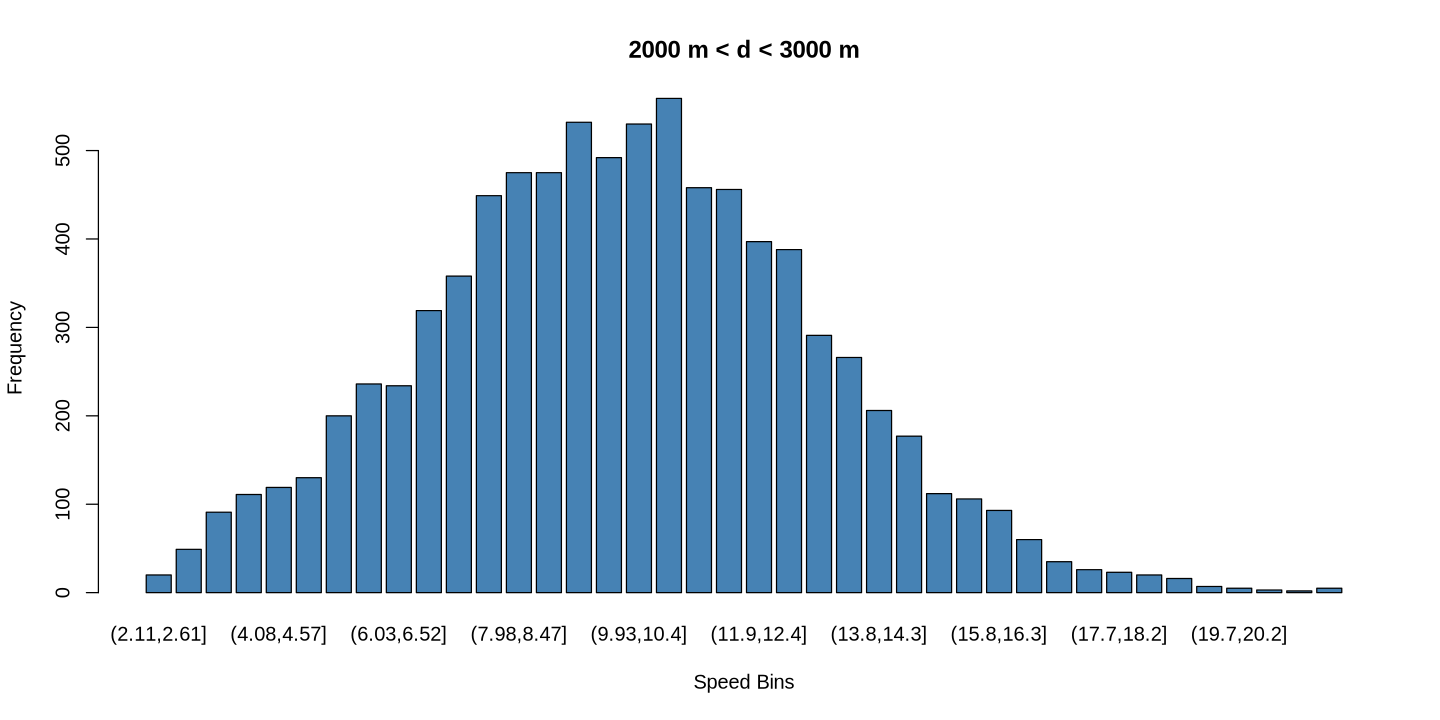

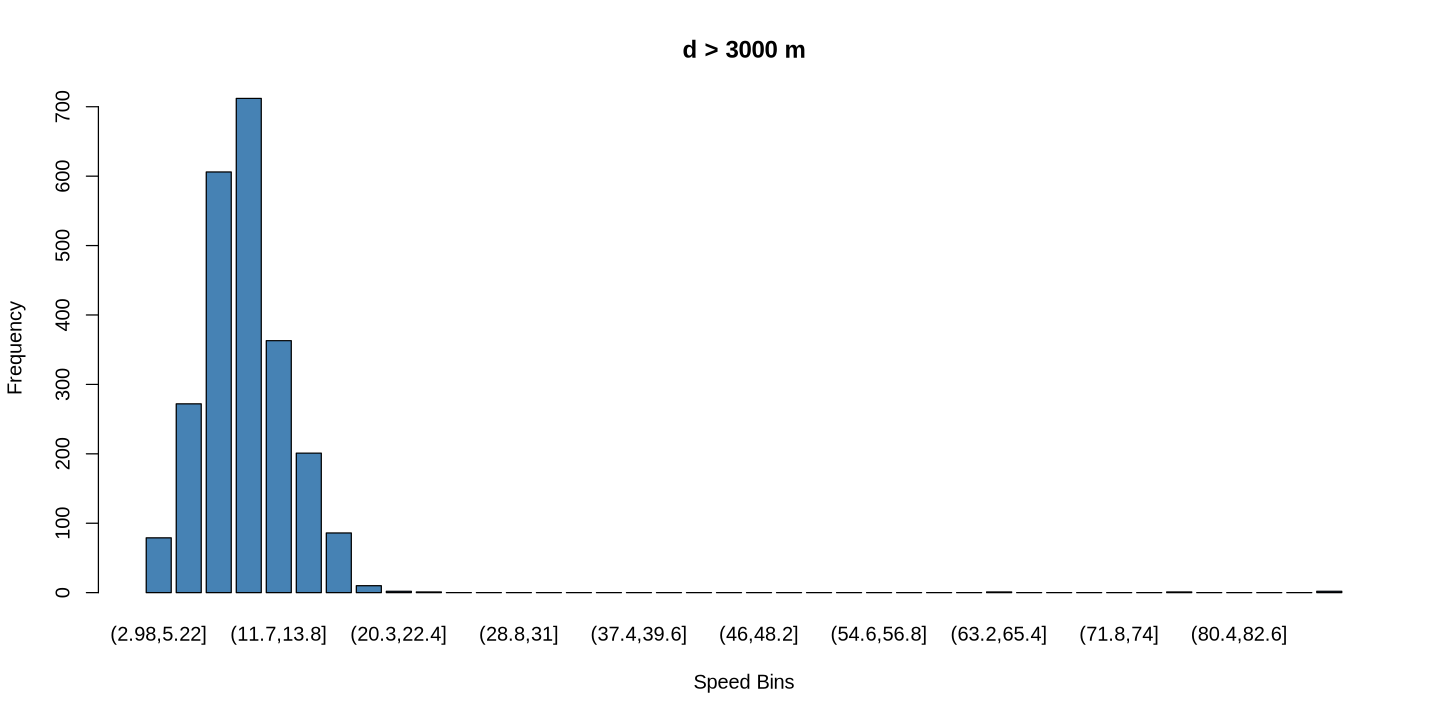

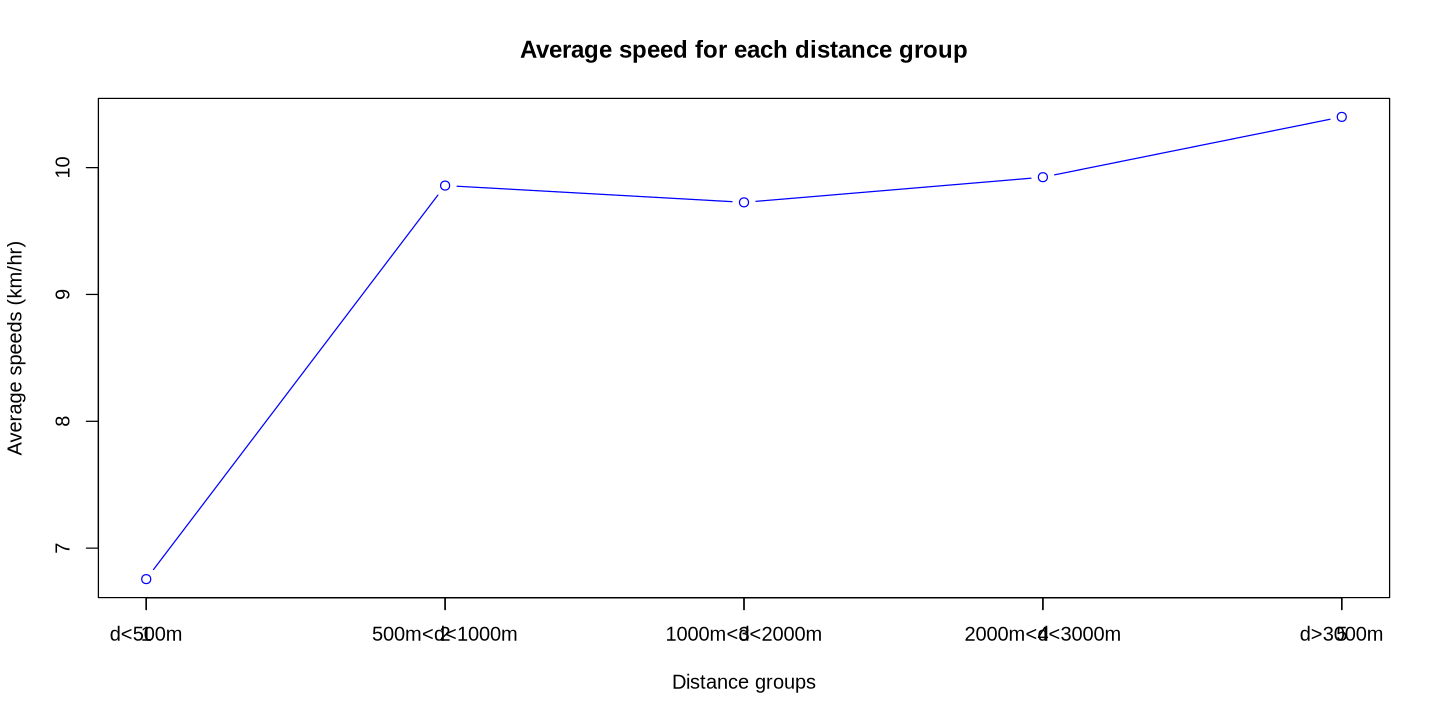

In [18]:
less1hour$route_length <- distHaversine(start,end)

## I've named each dataframe in alphabetical order, just for simplicity
# d < 500 m
a <- less1hour %>%  
    filter(route_length<500)

speed_bins <- cut(a$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d < 500 m",
        col = "steelblue")

################################################
# 500 m < d < 1000 m
b <- less1hour %>%
    filter(route_length > 500 & route_length < 1000)

speed_bins <- cut(b$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "500 m < d < 1000 m",
        col = "steelblue")

################################################
# 1000 m < d < 2000 m
c <- less1hour %>%
    filter(route_length > 1000 & route_length < 2000)

speed_bins <- cut(c$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "1000 < d < 2000 m",
        col = "steelblue")

################################################
# 2000 m < d < 3000 m
d <- less1hour %>%
    filter(route_length > 2000 & route_length < 3000)

speed_bins <- cut(d$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "2000 m < d < 3000 m",
        col = "steelblue")

################################################
# d > 3000 m
e <- less1hour %>%
    filter(route_length > 3000)

speed_bins <- cut(e$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts,
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d > 3000 m",
        col = "steelblue")

#################################################
# Plot of the average for each group of distances:
means <- c(mean(a$avg_speed),
            mean(b$avg_speed),
            mean(c$avg_speed),
            mean(d$avg_speed),
            mean(e$avg_speed))

plot(means,
    type = "b",
    col = "blue",
    xlab = "Distance groups",
    ylab = "Average speeds (km/hr)",
    main = "Average speed for each distance group")
distance_groups <-  c("d<500m","500m<d<1000m","1000m<d<2000m","2000m<d<3000m","d>3000m")
axis(1, at = 1:length(distance_groups), labels = distance_groups)

7.3) repeat the same graph, but show the results obtained separately for weekdays and weekends

First for weekdays:

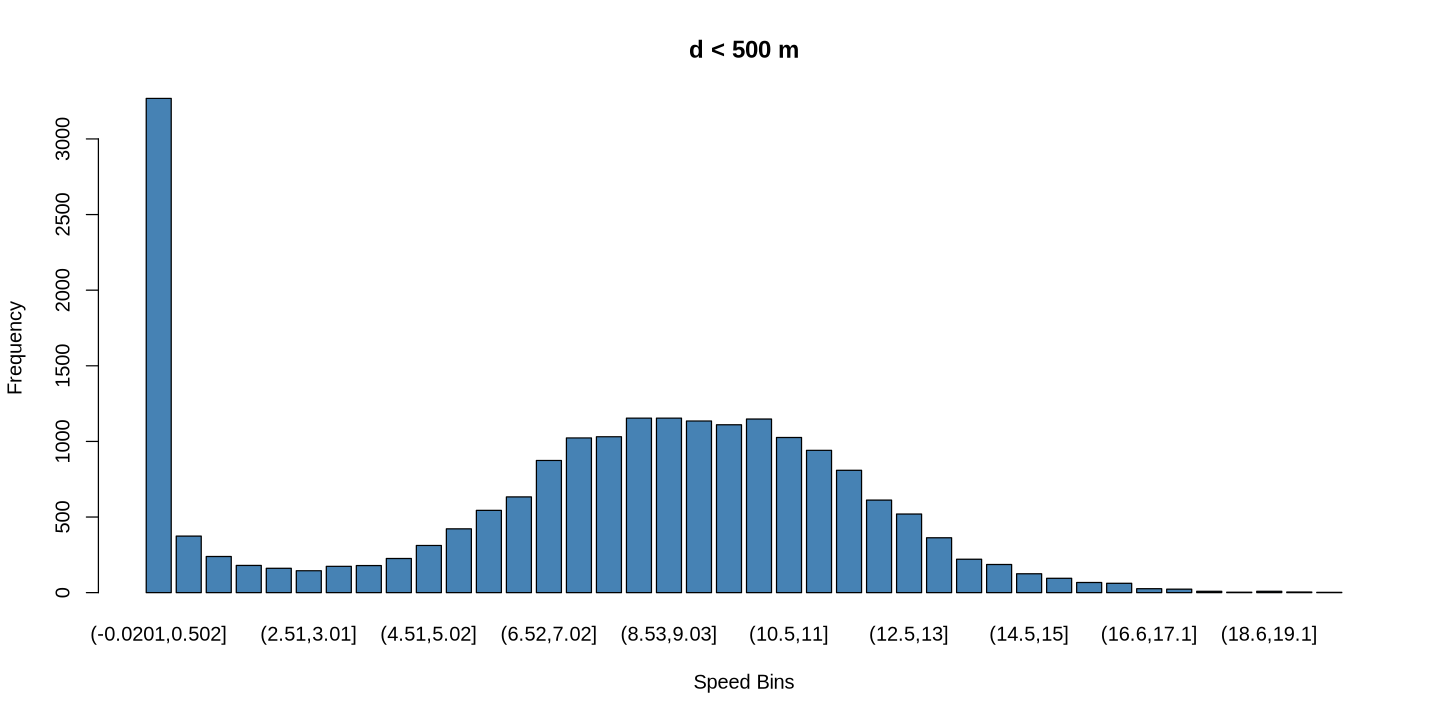

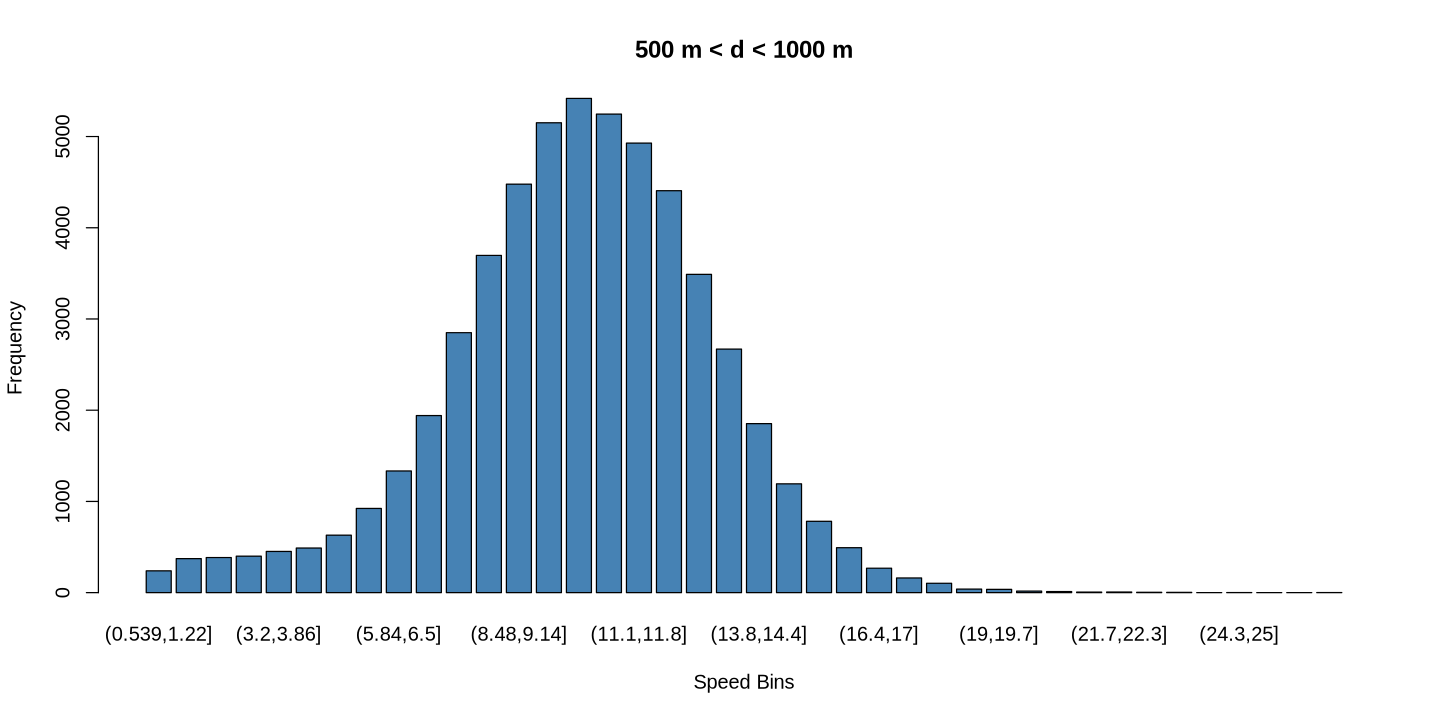

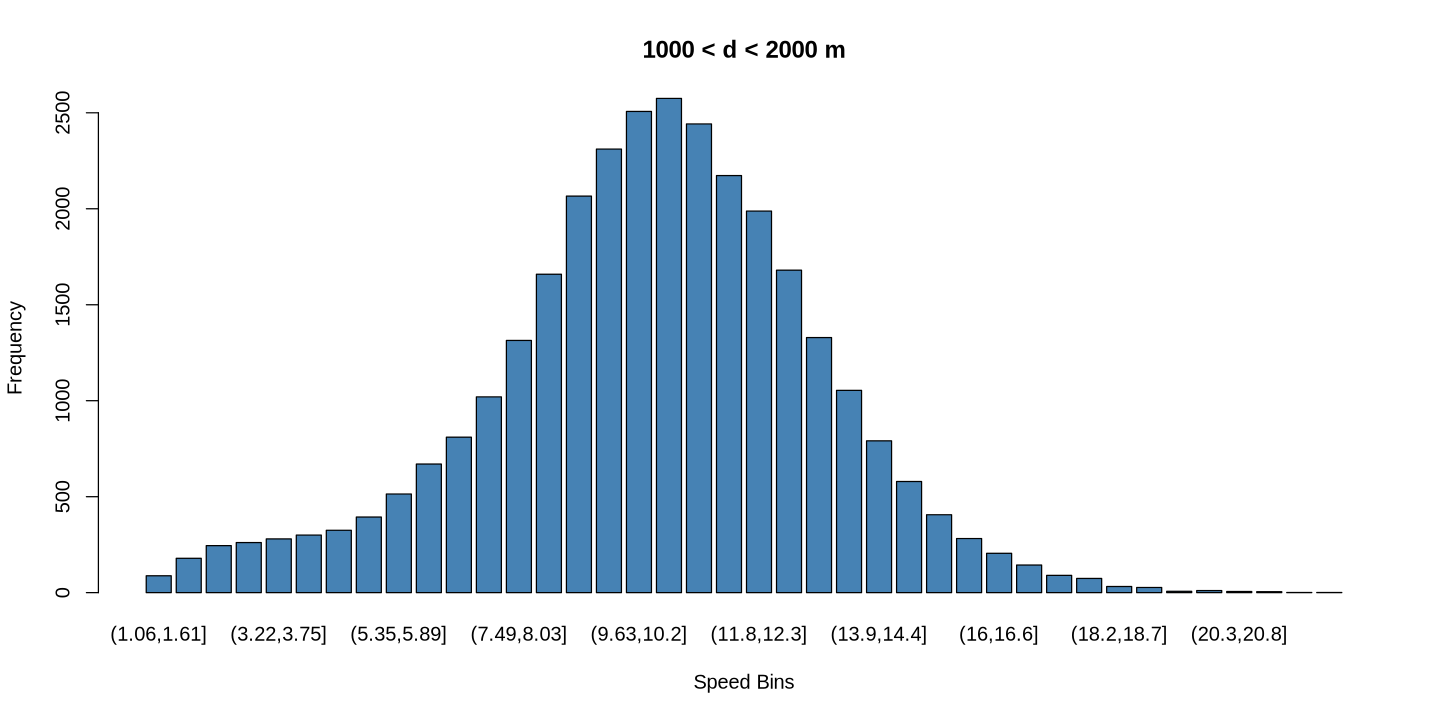

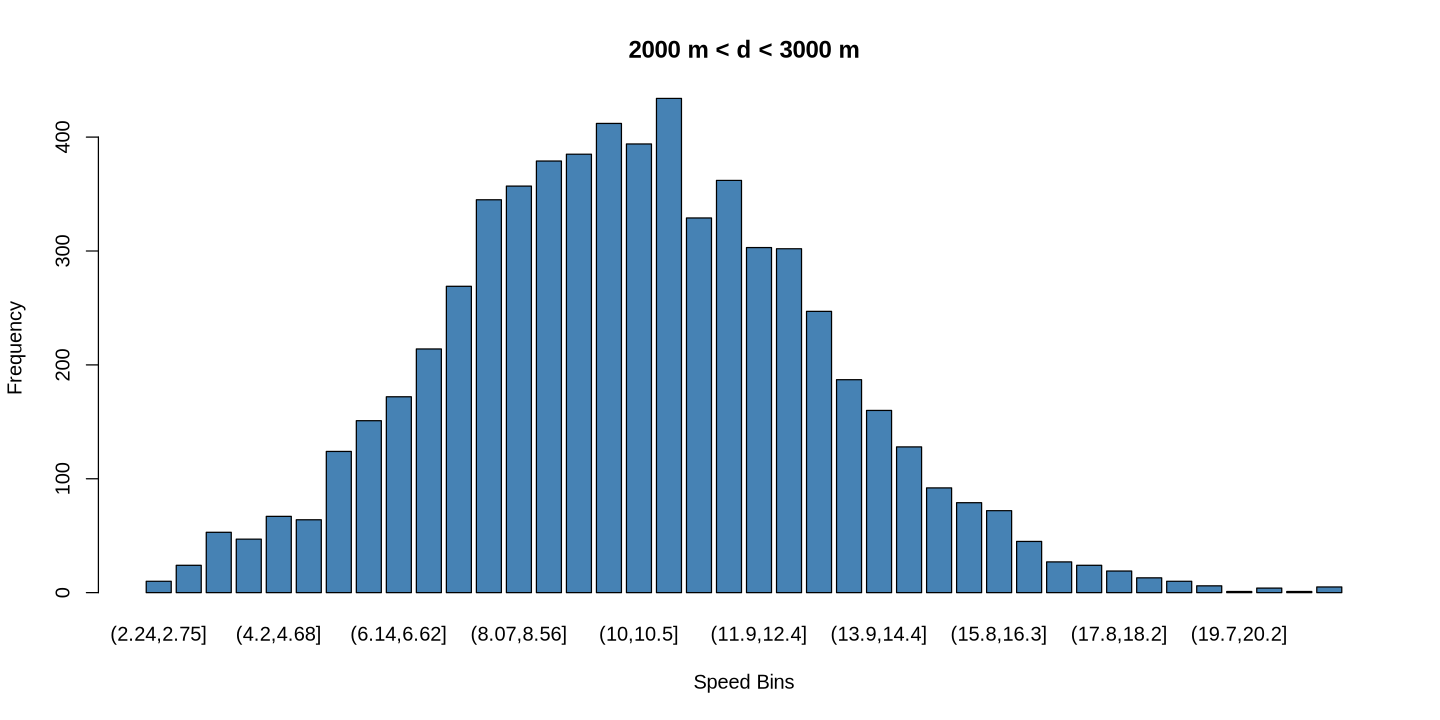

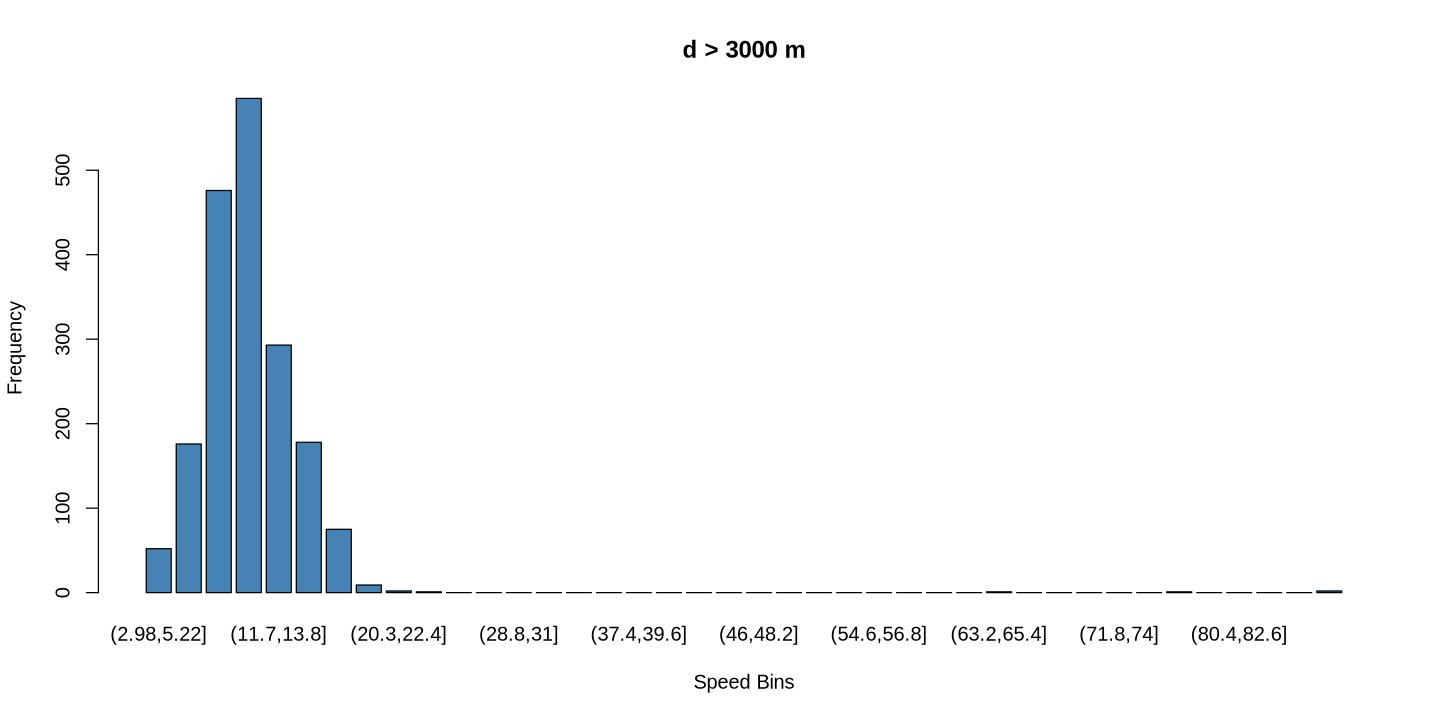

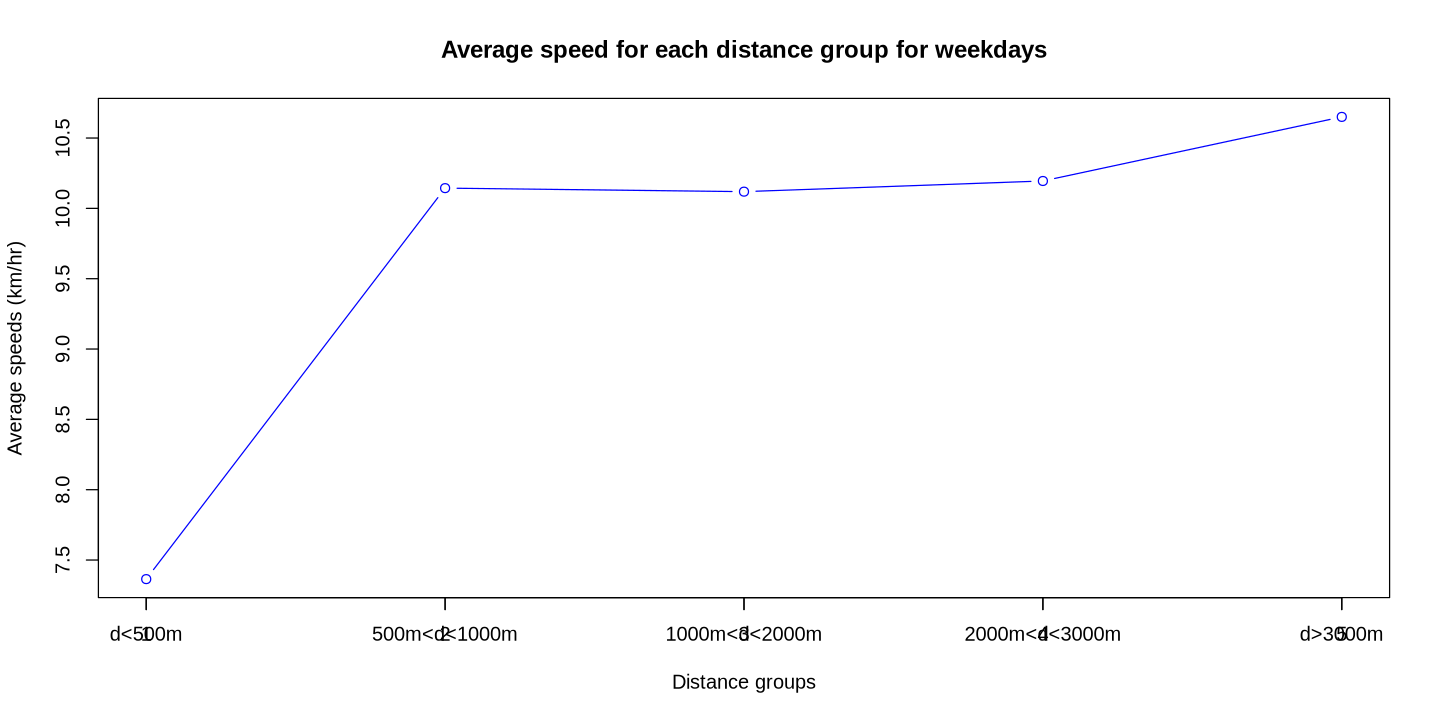

In [19]:

less1hour <- df %>%
    filter(tripduration < 3600)

less1hour_weekday <- less1hour %>%
    filter(weekday)

start <- less1hour_weekday %>%
    select(start.station.longitude,start.station.latitude)

end <- less1hour_weekday %>%
    select(end.station.longitude,end.station.latitude)

less1hour_weekday$avg_speed <- av_speed(start,end,less1hour_weekday$tripduration)

less1hour_weekday$route_length <- distHaversine(start,end)

# d < 500 m
a <- less1hour_weekday %>%
    filter(route_length<500)

speed_bins <- cut(a$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d < 500 m",
        col = "steelblue")

################################################
# 500 m < d < 1000 m
b <- less1hour_weekday %>%
    filter(route_length > 500 & route_length < 1000)

speed_bins <- cut(b$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "500 m < d < 1000 m",
        col = "steelblue")

################################################
# 1000 m < d < 2000 m
c <- less1hour_weekday %>%
    filter(route_length > 1000 & route_length < 2000)

speed_bins <- cut(c$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "1000 < d < 2000 m",
        col = "steelblue")

################################################
# 2000 m < d < 3000 m
d <- less1hour_weekday %>%
    filter(route_length > 2000 & route_length < 3000)

speed_bins <- cut(d$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "2000 m < d < 3000 m",
        col = "steelblue")

################################################
# d > 3000 m
e <- less1hour_weekday %>%
    filter(route_length > 3000)

speed_bins <- cut(e$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts,
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d > 3000 m",
        col = "steelblue")

#################################################
# Plot of the average for each group of distances for weekdays:
means <- c(mean(a$avg_speed),
            mean(b$avg_speed),
            mean(c$avg_speed),
            mean(d$avg_speed),
            mean(e$avg_speed))

plot(means,
    type = "b",
    col = "blue",
    xlab = "Distance groups",
    ylab = "Average speeds (km/hr)",
    main = "Average speed for each distance group for weekdays")
distance_groups <-  c("d<500m","500m<d<1000m","1000m<d<2000m","2000m<d<3000m","d>3000m")
axis(1, at = 1:length(distance_groups), labels = distance_groups)

Then for weekends:

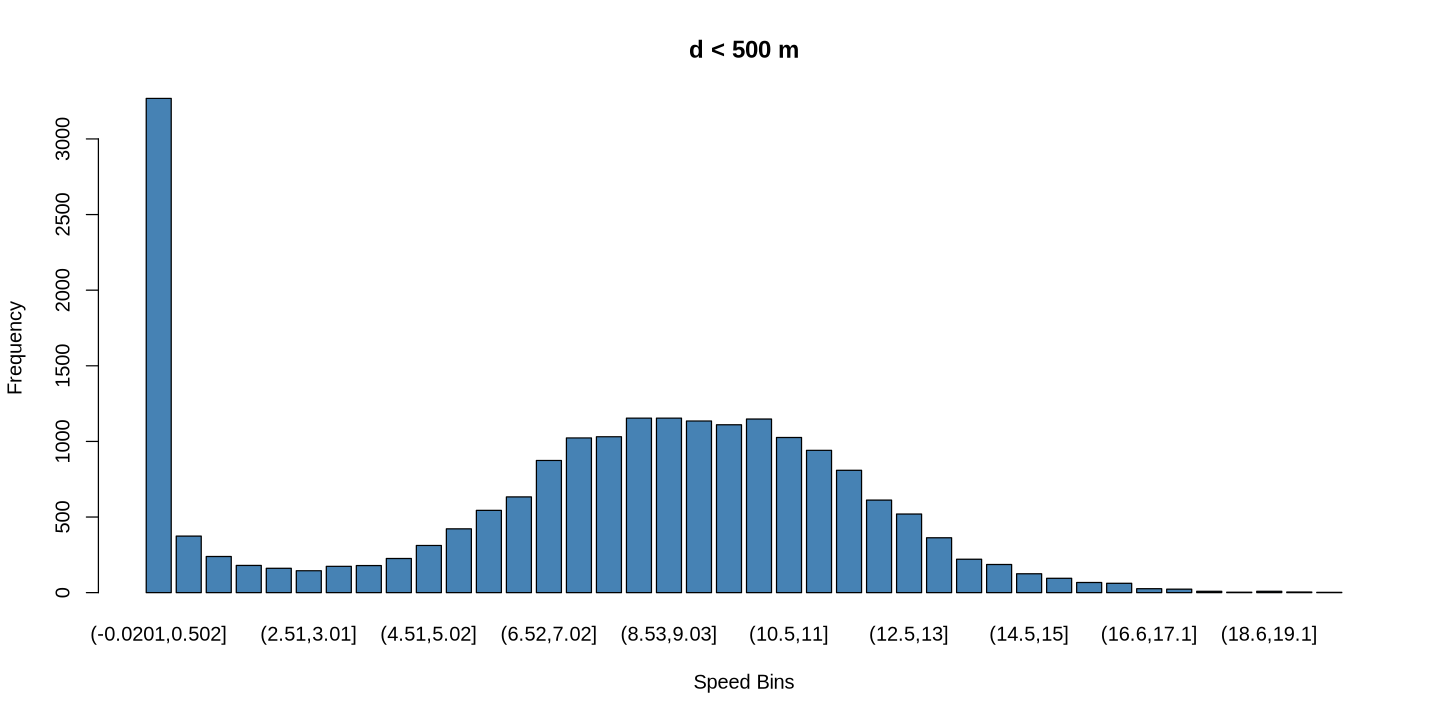

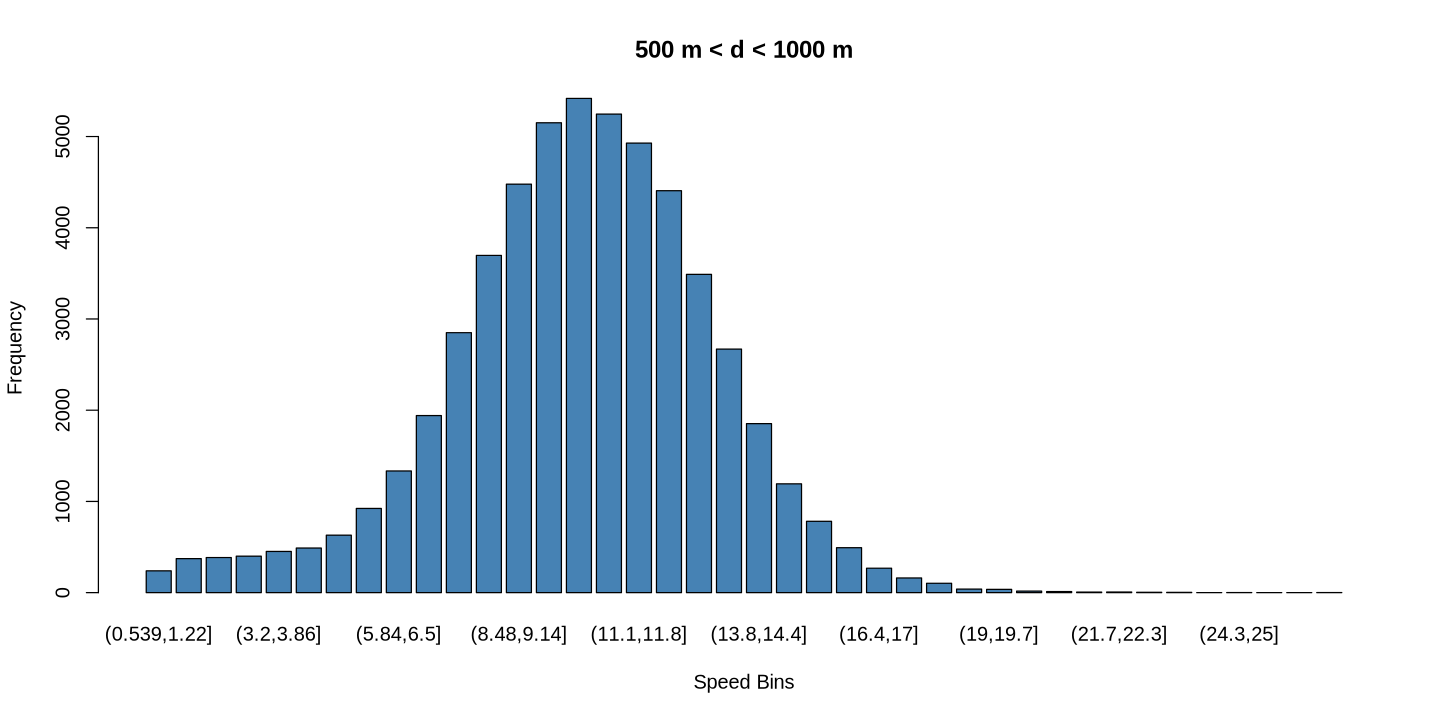

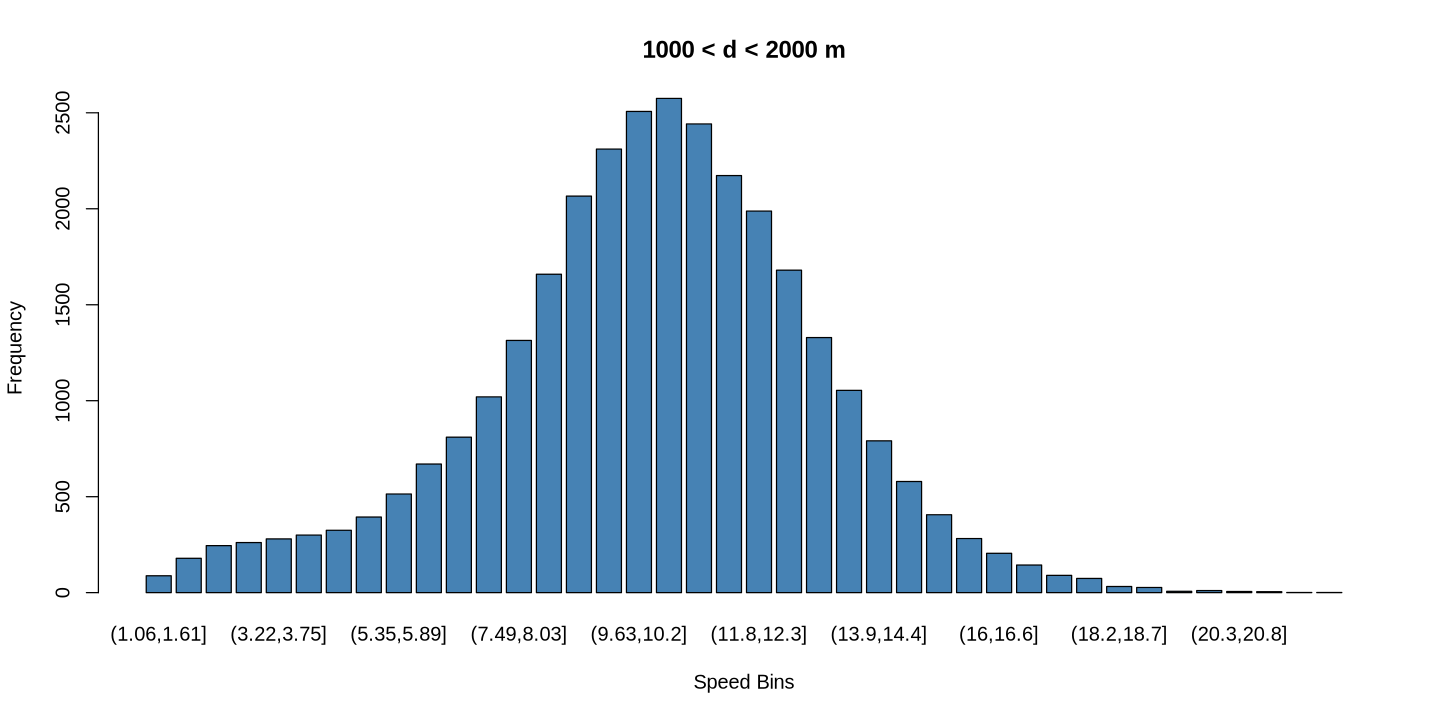

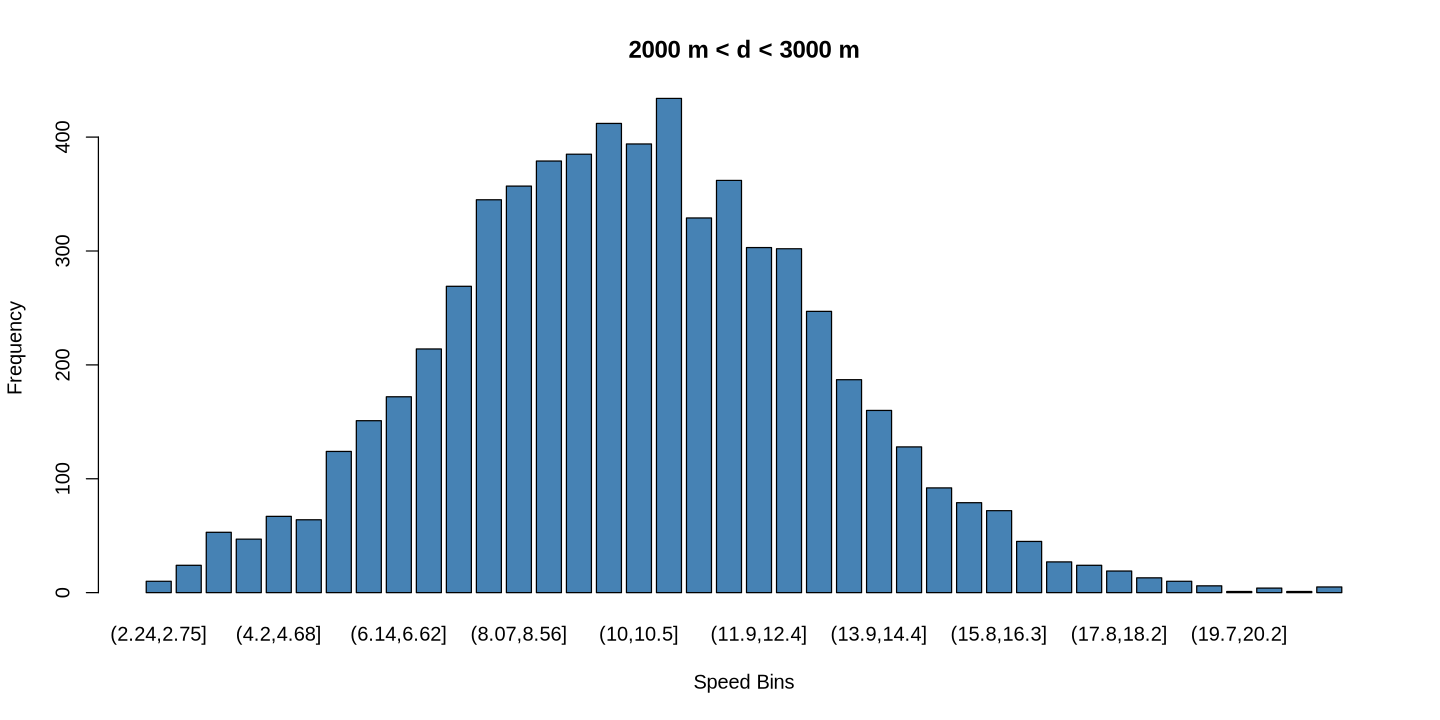

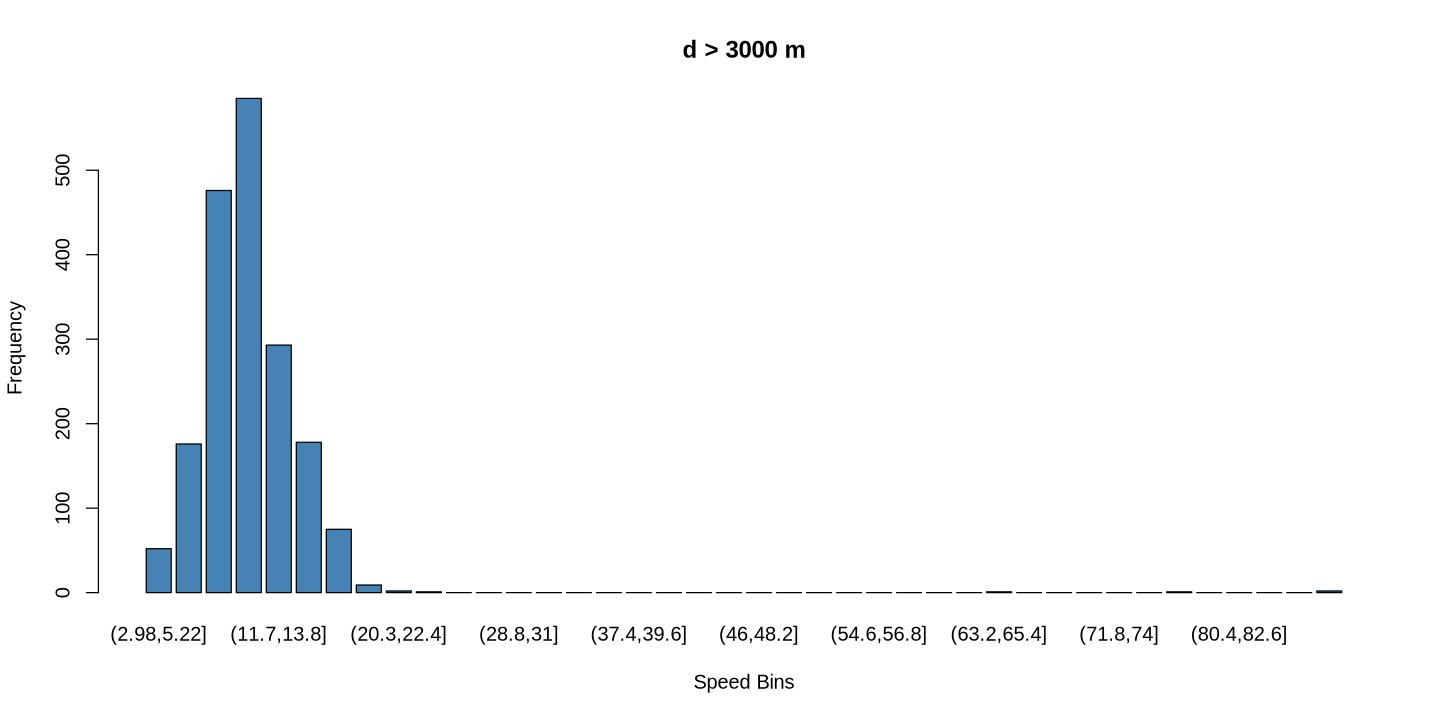

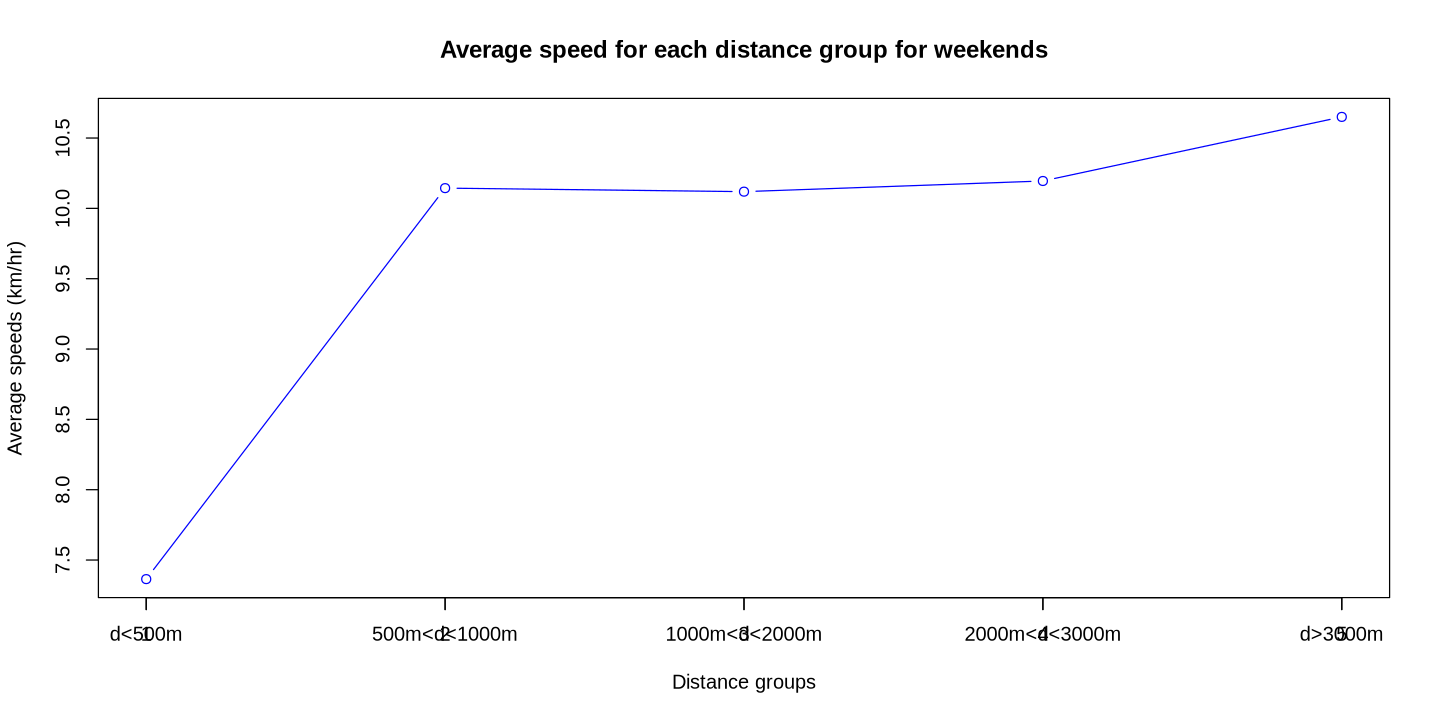

In [20]:

less1hour <- df %>%
    filter(tripduration < 3600)

less1hour_weekends <- less1hour %>%
    filter(weekday)

start <- less1hour_weekends %>%
    select(start.station.longitude,start.station.latitude)

end <- less1hour_weekends %>%
    select(end.station.longitude,end.station.latitude)

less1hour_weekends$avg_speed <- av_speed(start,end,less1hour_weekends$tripduration)

less1hour_weekends$route_length <- distHaversine(start,end)

# d < 500 m
a <- less1hour_weekends %>%
    filter(route_length<500)

speed_bins <- cut(a$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d < 500 m",
        col = "steelblue")

################################################
# 500 m < d < 1000 m
b <- less1hour_weekends %>%
    filter(route_length > 500 & route_length < 1000)

speed_bins <- cut(b$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "500 m < d < 1000 m",
        col = "steelblue")

################################################
# 1000 m < d < 2000 m
c <- less1hour_weekends %>%
    filter(route_length > 1000 & route_length < 2000)

speed_bins <- cut(c$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "1000 < d < 2000 m",
        col = "steelblue")

################################################
# 2000 m < d < 3000 m
d <- less1hour_weekends %>%
    filter(route_length > 2000 & route_length < 3000)

speed_bins <- cut(d$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts, 
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "2000 m < d < 3000 m",
        col = "steelblue")

################################################
# d > 3000 m
e <- less1hour_weekends %>%
    filter(route_length > 3000)

speed_bins <- cut(e$avg_speed,breaks = 40)

# Count the frequency of values in each bin
speed_counts <- table(speed_bins)

# Plot the bar plot
barplot(height = speed_counts,
        xlab = "Speed Bins",
        ylab = "Frequency",
        main = "d > 3000 m",
        col = "steelblue")

#################################################
# Plot of the average for each group of distances for weekends:
means <- c(mean(a$avg_speed),
            mean(b$avg_speed),
            mean(c$avg_speed),
            mean(d$avg_speed),
            mean(e$avg_speed))

plot(means,
    type = "b",
    col = "blue",
    xlab = "Distance groups",
    ylab = "Average speeds (km/hr)",
    main = "Average speed for each distance group for weekends")
distance_groups <-  c("d<500m","500m<d<1000m","1000m<d<2000m","2000m<d<3000m","d>3000m")
axis(1, at = 1:length(distance_groups), labels = distance_groups)

8.1) find the most common start station and the least popular end station

In [21]:
n_start_count <- df %>%
    group_by(start.station.name) %>%
    summarize(counts = n())

n_end_count <- df %>%
    group_by(end.station.name) %>%
    summarize(counts = n())

sorted_start <- n_start_count %>%
    arrange(desc(counts), .by_group = TRUE)

sorted_end <- n_end_count %>%
    arrange(desc(counts), .by_group = TRUE)

print(paste("Most popular start station:",head(sorted_start$start.station.name,n=1),
    "with",
    head(sorted_start$counts, n=1),
    "rides."))
print(paste("Most popular end station:",head(sorted_end$end.station.name,n=1),
    "with",
    head(sorted_end$counts, n=1),
    "rides."))

sorted_start <- n_start_count %>%
    filter(n_start_count$counts <= min(n_start_count$counts)) %>%
    arrange(counts, .by_group = TRUE)

sorted_end <- n_end_count %>%
    filter(n_end_count$counts < 2) %>%
    arrange(counts, .by_group = TRUE)
print(paste("Least popular start station:",sorted_start$start.station.name,
    "with",
    sorted_start$counts,
    "rides."))
print("Least popular end stations:")
print(paste(sorted_end$end.station.name,
    "with",
    sorted_end$counts,
    "ride."))

[1] "Most popular start station: Grove St PATH with 17902 rides."
[1] "Most popular end station: Grove St PATH with 21350 rides."
[1] "Least popular start station: JCBS Depot with 29 rides."
[1] "Least popular end stations:"
 [1] "1 Ave & E 16 St with 1 ride."         
 [2] "8 Ave & W 52 St with 1 ride."         
 [3] "Broadway & W 56 St with 1 ride."      
 [4] "E 33 St & 5 Ave with 1 ride."         
 [5] "Norfolk St & Broome St with 1 ride."  
 [6] "South St & Gouverneur Ln with 1 ride."
 [7] "Spruce St & Nassau St with 1 ride."   
 [8] "W 15 St & 10 Ave with 1 ride."        
 [9] "W 15 St & 6 Ave with 1 ride."         
[10] "W 20 St & 11 Ave with 1 ride."        
[11] "W 27 St & 10 Ave with 1 ride."        
[12] "W 38 St & 8 Ave with 1 ride."         
[13] "W 41 St & 8 Ave with 1 ride."         
[14] "W 43 St & 6 Ave with 1 ride."         
[15] "W 56 St & 10 Ave with 1 ride."        
[16] "West St & Chambers St with 1 ride."   


8.2) show the distribution of start stations

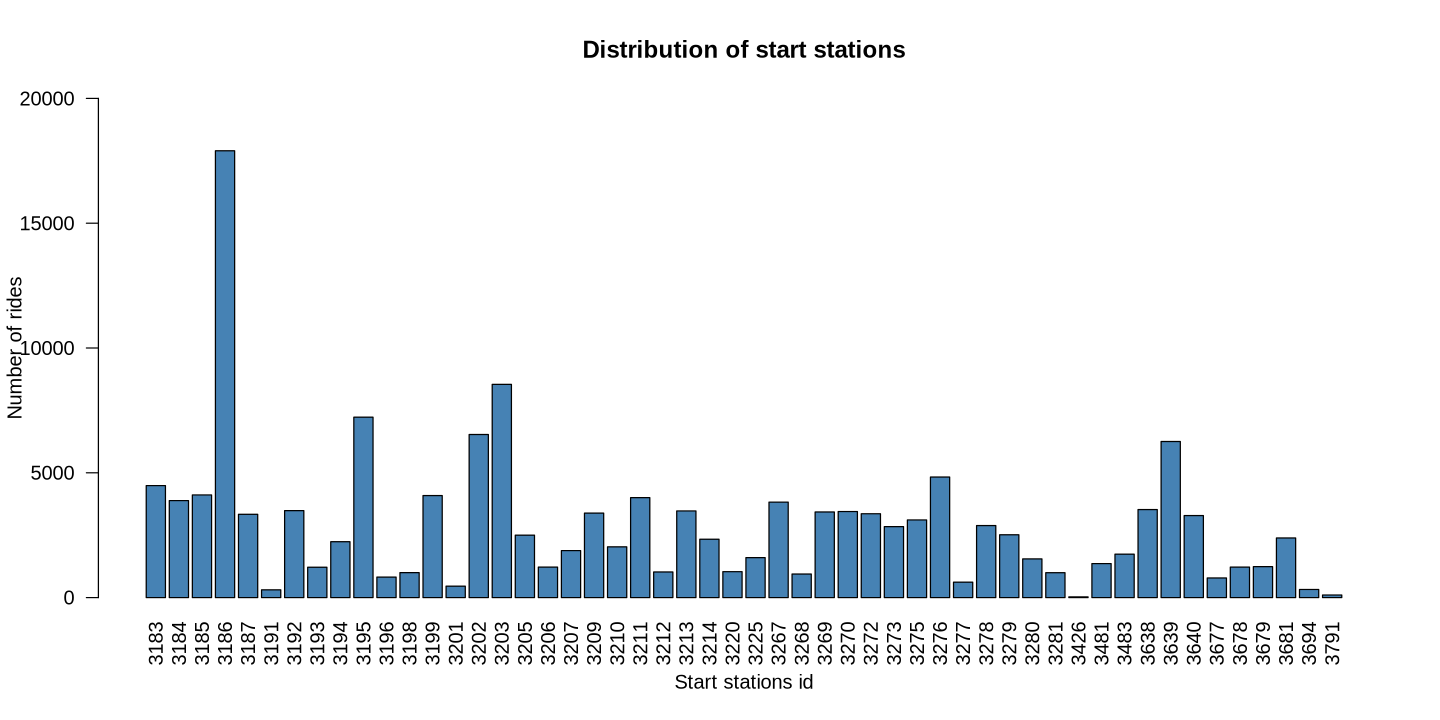

In [22]:
n_start_count <- df %>%
    group_by(start.station.id) %>%
    summarize(counts = n())

barplot(n_start_count$counts ~ n_start_count$start.station.id,
        width = 100,
        ylim = c(0,20000),
        xlab = "Start stations id",
        ylab = "Number of rides",
        las = 2,
        col = "steelblue",
        main = "Distribution of start stations")


8.3) find the three most common routes (start and end station) and the three least popular ones

In [23]:
route_count <- df %>%
    select(start.station.id, start.station.name, end.station.id, end.station.name) %>%
    group_by(start.station.id, start.station.name, end.station.id, end.station.name, .add = TRUE) %>%
    summarize(nrides = n(), .groups = "keep") %>%
    arrange(desc(nrides))

print("The three most popular routes (start and end station):")
head(route_count, n = 3)

route_count <- df %>%
    select(start.station.id, start.station.name, end.station.id, end.station.name) %>%
    group_by(start.station.id, start.station.name, end.station.id, end.station.name, .add = TRUE) %>%
    summarize(nrides = n(), .groups = "keep") %>%
    arrange(nrides)

print("The three least popular routes (start and end station):")
head(route_count, n = 3)

[1] "The three most popular routes (start and end station):"


start.station.id,start.station.name,end.station.id,end.station.name,nrides
<int>,<chr>,<int>,<chr>,<int>
3203,Hamilton Park,3186,Grove St PATH,3037
3186,Grove St PATH,3203,Hamilton Park,2318
3269,Brunswick & 6th,3186,Grove St PATH,1916


[1] "The three least popular routes (start and end station):"


start.station.id,start.station.name,end.station.id,end.station.name,nrides
<int>,<chr>,<int>,<chr>,<int>
3183,Exchange Place,224,Spruce St & Nassau St,1
3183,Exchange Place,311,Norfolk St & Broome St,1
3183,Exchange Place,3679,Bergen Ave,1


Since there are various routes which have only 1 ride in the data, three of those routes arbitrarly chosen are shown above.